# Projeto 1 - Ciência dos Dados

Nome: Willian Kenzo Asanuma Lee

## Pergunta (s) a ser respondida

Houve aumento das exportações/importações após 1992, no qual foi criado uma zona de livre comercio entre os países membros?



## Explicação da hipótese e mecanismo

Uma das principais funções na criação de uma zona de livre comércio é aumentar a troca de produtos entre tais países, por meio da redução de taxas de importação aplicadas a produtos oriundos dos seus integrantes, estimulando a abertura de novos negócios e subsequentemente a geração de novos empregos.
-para analisar tal fato, será analisado a porcentagem de importações e exportações

Sendo criado uma zona de livre comércio, no qual seu objetivo é estimular o comércio entre os países participantes, acredita-se que estimula os negócios com a redução das taxas alfandegarias.




## Bases de dados usadas

https://pdfs.semanticscholar.org/7284/6d7b8bd92dd74108f9fcb59f668adde2badd.pdf
https://pdfs.semanticscholar.org/36aa/426ac1a1e5ca29fa5e19de2e4b075328e31b.pdf

## Análise de dados

### Importações e leituras
O programa importa as bibliotecas e le os arquivos que serão utilziados.

In [125]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

print(os.getcwd())

C:\Users\Willian\Desktop\CD\Projeto-1


In [126]:
export=pd.read_excel('ExportGDP.xlsx')
imports=pd.read_excel('ImportGDP.xlsx')

export_idx = export.set_index('Exports of goods and services (% of GDP)')
import_idx = imports.set_index('Imports of goods and services (% of GDP)')

In [127]:
exp_imp = export_idx.join(import_idx, how='inner', rsuffix='_imp', lsuffix='_exp')

# Criando duas colunas e "setando elas como zero"


In [128]:
exp_imp['ComunidadeAndina']=0
exp_imp['PaisesComparados']=0
comunidadeandina=['Colombia','Peru','Ecuador','Bolivia']
paisescomparados=['Brazil','Chile','Argentina','Venezuela','Paraguay','Mexico']
exp_imp.loc[comunidadeandina,['ComunidadeAndina']]=1
exp_imp.loc[paisescomparados,['PaisesComparados']]=1


In [129]:
dados_comunidadeandin=exp_imp.loc[exp_imp.ComunidadeAndina == 1]
dados_comunidadeandin.head()

,1961_exp,1962_exp,1963_exp,1964_exp,1965_exp,1966_exp,1967_exp,1968_exp,1969_exp,1970_exp,...,2004_imp,2005_imp,2006_imp,2007_imp,2008_imp,2009_imp,2010_imp,2011_imp,ComunidadeAndina,PaisesComparados
Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.594505,...,26.325876,32.093798,32.766134,34.266255,37.960465,32.904449,34.324170,NaN,1,0
Colombia,12.955780,12.191377,11.976231,11.919976,11.420681,12.112785,11.976380,12.984214,13.226423,14.310678,...,19.258893,18.790116,20.660378,19.937885,20.272225,18.180863,17.927930,NaN,1,0
Ecuador,16.493213,17.889721,16.246073,15.654251,16.248990,17.704427,16.792323,16.944801,14.039125,15.232975,...,29.267045,32.000926,32.967023,34.434145,37.790252,31.974992,38.618483,NaN,1,0
Peru,21.375351,20.510689,18.950042,19.017476,16.097923,15.987461,15.844299,18.602499,17.941299,17.892857,...,17.815715,19.166859,19.855129,22.411906,27.082653,20.396522,22.247876,NaN,1,0


In [130]:
dados_comparacao=exp_imp.loc[exp_imp.PaisesComparados==1]
dados_comparacao.head()

,1961_exp,1962_exp,1963_exp,1964_exp,1965_exp,1966_exp,1967_exp,1968_exp,1969_exp,1970_exp,...,2004_imp,2005_imp,2006_imp,2007_imp,2008_imp,2009_imp,2010_imp,2011_imp,ComunidadeAndina,PaisesComparados
Argentina,5.994947,4.691843,7.890454,5.563716,6.225874,6.652917,7.495596,6.484453,6.398713,5.601567,...,18.167248,19.188720,19.232168,20.337126,20.650425,16.002351,18.400200,NaN,0,1
Brazil,7.279410,3.868761,9.036455,6.385409,7.735761,6.824735,5.768971,6.000526,6.620404,7.029436,...,12.548146,11.520003,11.465745,11.846759,13.474681,11.177423,12.146704,NaN,0,1
Chile,12.041443,11.921820,12.264631,12.609890,13.605442,14.809330,14.269406,13.977390,16.456235,14.612954,...,31.584870,32.812127,30.708792,33.243500,41.070656,31.210657,31.847230,NaN,0,1
Mexico,8.416078,8.557251,8.331766,7.636821,7.637846,7.465729,6.868679,7.037058,7.538180,7.749880,...,28.373704,28.553069,29.215821,29.507969,30.280773,29.064917,31.735666,NaN,0,1
Paraguay,19.217292,12.629500,11.559751,12.256633,14.957803,13.246339,12.218457,12.355364,13.577676,14.917086,...,50.005335,55.609663,58.237354,53.916445,55.564397,51.597401,54.955957,NaN,0,1


# Juntando os dados de comparação em uma única lista


In [131]:
dados_juntos=pd.concat([dados_comparacao,dados_comunidadeandina])
dados_juntos

,1961_exp,1962_exp,1963_exp,1964_exp,1965_exp,1966_exp,1967_exp,1968_exp,1969_exp,1970_exp,...,2004_imp,2005_imp,2006_imp,2007_imp,2008_imp,2009_imp,2010_imp,2011_imp,ComunidadeAndina,PaisesComparados
Argentina,5.994947,4.691843,7.890454,5.563716,6.225874,6.652917,7.495596,6.484453,6.398713,5.601567,...,18.167248,19.188720,19.232168,20.337126,20.650425,16.002351,18.400200,NaN,0,1
Brazil,7.279410,3.868761,9.036455,6.385409,7.735761,6.824735,5.768971,6.000526,6.620404,7.029436,...,12.548146,11.520003,11.465745,11.846759,13.474681,11.177423,12.146704,NaN,0,1
Chile,12.041443,11.921820,12.264631,12.609890,13.605442,14.809330,14.269406,13.977390,16.456235,14.612954,...,31.584870,32.812127,30.708792,33.243500,41.070656,31.210657,31.847230,NaN,0,1
Mexico,8.416078,8.557251,8.331766,7.636821,7.637846,7.465729,6.868679,7.037058,7.538180,7.749880,...,28.373704,28.553069,29.215821,29.507969,30.280773,29.064917,31.735666,NaN,0,1
Paraguay,19.217292,12.629500,11.559751,12.256633,14.957803,13.246339,12.218457,12.355364,13.577676,14.917086,...,50.005335,55.609663,58.237354,53.916445,55.564397,51.597401,54.955957,NaN,0,1
Venezuela,28.672805,29.170225,28.872649,26.822811,25.815217,24.337712,24.294020,22.369669,21.330902,20.920502,...,19.169102,20.468677,22.146970,25.296647,21.114516,20.469792,17.174972,NaN,0,1
Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.594505,...,26.325876,32.093798,32.766134,34.266255,37.960465,32.904449,34.324170,NaN,1,0
Colombia,12.955780,12.191377,11.976231,11.919976,11.420681,12.112785,11.976380,12.984214,13.226423,14.310678,...,19.258893,18.790116,20.660378,19.937885,20.272225,18.180863,17.927930,NaN,1,0
Ecuador,16.493213,17.889721,16.246073,15.654251,16.248990,17.704427,16.792323,16.944801,14.039125,15.232975,...,29.267045,32.000926,32.967023,34.434145,37.790252,31.974992,38.618483,NaN,1,0
Peru,21.375351,20.510689,18.950042,19.017476,16.097923,15.987461,15.844299,18.602499,17.941299,17.892857,...,17.815715,19.166859,19.855129,22.411906,27.082653,20.396522,22.247876,NaN,1,0


In [132]:
exportacao=dados_juntos.loc[:,['1970_exp','1971_exp','1972_exp','1973_exp','1974_exp','1975_exp','1976_exp','1977_exp','1978_exp','1979_exp','1980_exp','1981_exp','1982_exp','1983_exp','1940_exp','1985_exp','1986_exp','1987_exp','1988_exp','1989_exp','1990_exp','1991_exp','1992_exp','1993_exp','1994_exp','1995_exp','1996_exp','1997_exp','1998_exp','1999_exp','2000_exp']]
exportacao.head(3)


,1970_exp,1971_exp,1972_exp,1973_exp,1974_exp,1975_exp,1976_exp,1977_exp,1978_exp,1979_exp,...,1991_exp,1992_exp,1993_exp,1994_exp,1995_exp,1996_exp,1997_exp,1998_exp,1999_exp,2000_exp
Argentina,5.601567,6.007233,7.197766,7.612668,6.902571,5.824052,9.175388,9.615892,8.608390,6.510915,...,7.675043,6.598187,6.909352,7.521832,9.648808,10.399127,10.528654,10.385004,9.787988,10.885465
Brazil,7.029436,6.413307,7.259176,8.271678,8.013119,7.538573,7.035714,7.252368,6.675579,7.123905,...,8.676973,10.868250,10.503270,8.456925,7.256806,6.566742,6.820657,6.932775,9.411089,9.978194
Chile,14.612954,11.028567,9.821874,13.653825,20.382326,25.437686,25.124960,20.620943,20.582674,23.276835,...,32.396379,29.811927,26.623158,28.237889,29.302786,27.276775,27.083765,26.299911,29.598014,29.287151


In [133]:
importacao=dados_juntos.loc[:,['1970_imp','1971_imp','1972_imp','1973_imp','1974_imp','1975_imp','1976_imp','1977_imp','1978_imp','1979_imp','1980_imp','1981_imp','1982_imp','1983_imp','1940_imp','1985_imp','1986_imp','1987_imp','1988_imp','1989_imp','1990_imp','1991_imp','1992_imp','1993_imp','1994_imp','1995_imp','1996_imp','1997_imp','1998_imp','1999_imp','2000_imp']]
importacao.head(3)

,1970_imp,1971_imp,1972_imp,1973_imp,1974_imp,1975_imp,1976_imp,1977_imp,1978_imp,1979_imp,...,1991_imp,1992_imp,1993_imp,1994_imp,1995_imp,1996_imp,1997_imp,1998_imp,1999_imp,2000_imp
Argentina,4.735877,6.607956,6.837877,5.709501,6.289009,5.978672,5.921496,7.326394,5.715406,6.329769,...,6.078011,8.132793,9.313800,10.600049,10.075306,11.068685,12.772670,12.931598,11.534090,11.519271
Brazil,7.449759,8.137973,8.844076,9.501581,13.883728,11.505580,9.432618,7.917748,7.864394,9.175568,...,7.913944,8.385095,9.096046,9.161622,8.775002,8.366099,9.020423,8.932220,10.816056,11.741680
Chile,14.020537,12.024202,13.234560,15.468089,19.705883,27.410518,20.795858,22.422818,23.925948,26.107768,...,27.770304,28.169026,28.618885,26.574231,27.102641,28.965174,29.203071,29.565982,27.325768,29.732518


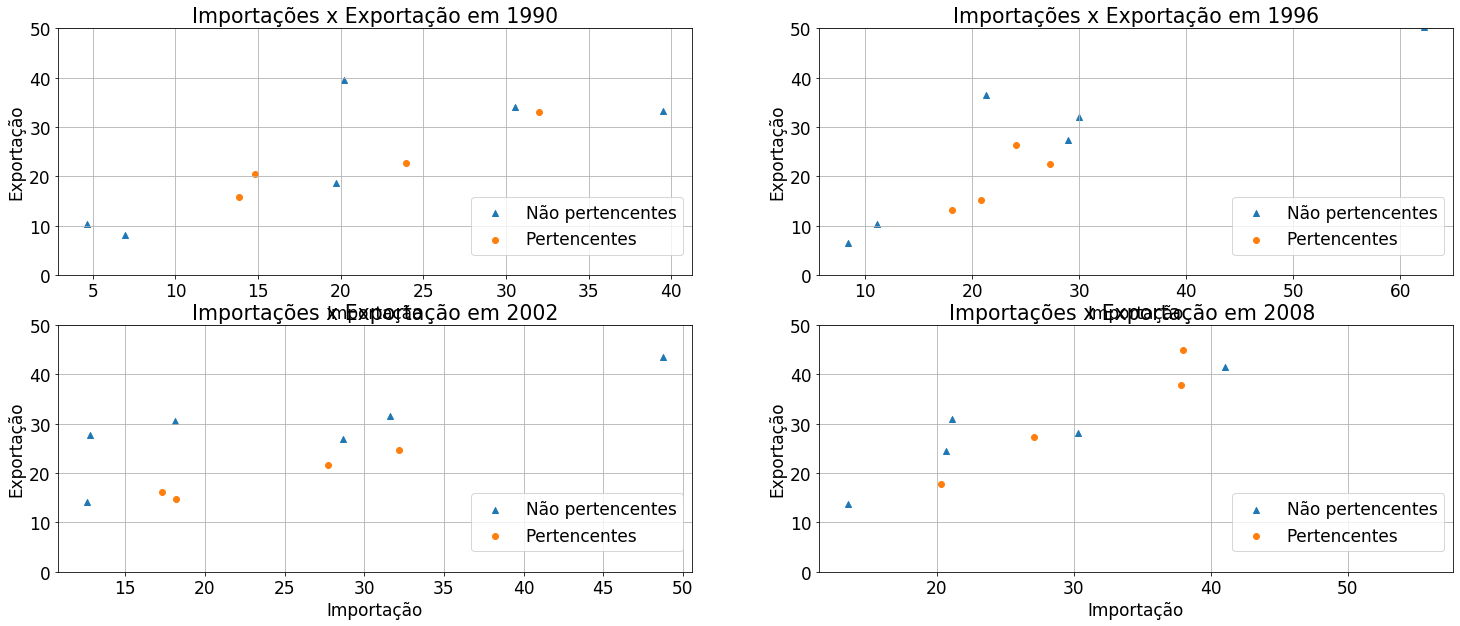

In [134]:
plt.figure(figsize=(25,10))

plt.rc('legend',fontsize=17)
plt.rc('font',size=17)



plt.subplot(221)
plot=plt.scatter(dados_comparacao['1990_imp'],dados_comparacao['1990_exp'],marker='^')
plt.scatter(dados_comunidadeandin['1990_imp'],dados_comunidadeandin['1990_exp'],marker='o')
plt.legend(('Não pertencentes','Pertencentes'),loc='center right', bbox_to_anchor=(1,0.2))
plt.xlabel('Importação')
plt.ylabel('Exportação')
plt.title('Importações x Exportação em 1990')
plt.ylim(0,50)

plt.grid()

plt.subplot(222)
plot=plt.scatter(dados_comparacao['1996_imp'],dados_comparacao['1996_exp'],marker='^')
plt.scatter(dados_comunidadeandin['1996_imp'],dados_comunidadeandin['1996_exp'],marker='o')
plt.legend(('Não pertencentes','Pertencentes'),loc='center right', bbox_to_anchor=(1,0.2))
plt.title('Importações x Exportação em 1996')
plt.xlabel('Importação')
plt.ylabel('Exportação')
plt.ylim(0,50)

plt.grid()

plt.subplot(223)
plot=plt.scatter(dados_comparacao['2002_imp'],dados_comparacao['2002_exp'],marker='^')
plt.scatter(dados_comunidadeandin['2002_imp'],dados_comunidadeandin['2002_exp'],marker='o')
plt.legend(('Não pertencentes','Pertencentes'),loc='center right', bbox_to_anchor=(1,0.2))
plt.title('Importações x Exportação em 2002')
plt.xlabel('Importação')
plt.ylabel('Exportação')
plt.ylim(0,50)

plt.grid()

plt.subplot(224)
plot=plt.scatter(dados_comparacao['2008_imp'],dados_comparacao['2008_exp'],marker='^')
plt.scatter(dados_comunidadeandin['2008_imp'],dados_comunidadeandin['2008_exp'],marker='o')
plt.legend(('Não pertencentes','Pertencentes'),loc='center right', bbox_to_anchor=(1,0.2))
plt.title('Importações x Exportação em 2008 ')
plt.xlabel('Importação')
plt.ylabel('Exportação')
plt.ylim(0,50)

plt.grid()




plt.tight_layout
plt.show()

-Uma das coisas que é possível analisar que entre os países comparados com os pertencentes a comunidade andina, as importações e exportações não dão um salto maior se comparado a outros países não pertencentes a tal organização, entretanto, uma das coisas que é importante se notar, é que os países que foram comparados-não pertencentes, também pertencem a outras organizações internacionais

In [135]:
importacao_comparacao_selec=dados_comparacao.loc[:,['1992_imp','1993_imp','1994_imp','1996_imp','2002_imp','2008_imp']]
importacao_comunidade_selec=dados_comunidadeandina.loc[:,['1992_imp','1993_imp','1994_imp','1996_imp','2002_imp','2008_imp']]
exportacao_comparacao_selec=dados_comparacao.loc[:,['1992_exp','1993_exp','1994_exp','1996_exp','2002_exp','2008_exp']]
exportacao_comunidade_selec=dados_comunidadeandin.loc[:,['1992_exp','1993_exp','1994_exp','1996_exp','2002_exp','2008_exp']]


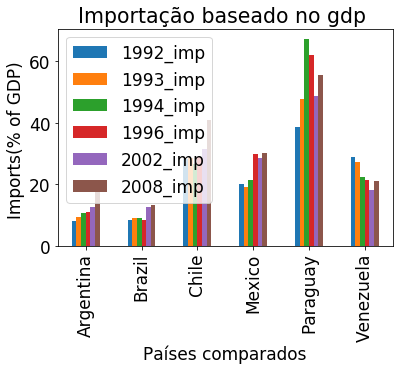

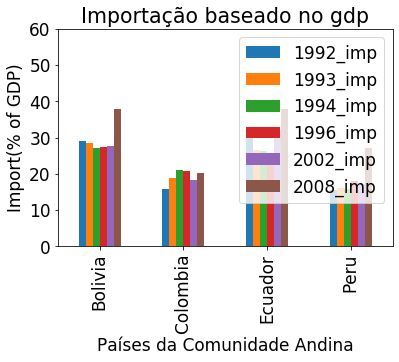

In [136]:
plot = importacao_comparacao_selec.plot(kind='bar',title='Importação baseado no gdp ')
plt.ylabel('Imports(% of GDP) ')
plt.xlabel('Países comparados')

plot = importacao_comunidade_selec.plot(kind='bar',title='Importação baseado no gdp')
plt.ylabel('Import(% of GDP)')
plt.xlabel('Países da Comunidade Andina')
plt.ylim(0,60)



plt.show()

-É possível notar que as importações na comunidade andina, não aumentaram logo após a criação da zona de livre comércio, mas é possível notar que se comparado a um longo período de tempo, como de 1992 a 2008, há um aumento nas importações, mostrando que o impacto nas zonas de livre comércio não causa impacto instantâneo
nas importações.

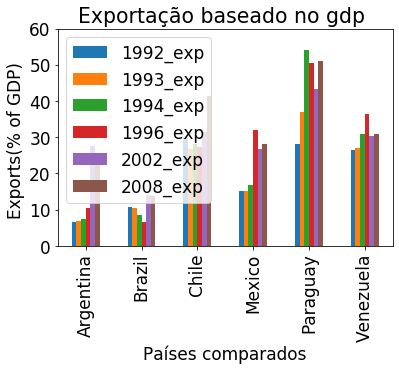

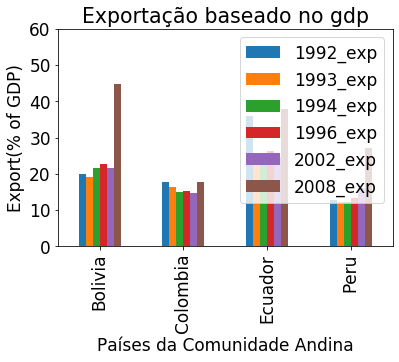

In [137]:
plot = exportacao_comparacao_selec.plot(kind='bar',title='Exportação baseado no gdp ')
plt.ylabel('Exports(% of GDP) ')
plt.xlabel('Países comparados')
plt.ylim(0,60)

plot = exportacao_comunidade_selec.plot(kind='bar',title='Exportação baseado no gdp')
plt.ylabel('Export(% of GDP)')
plt.xlabel('Países da Comunidade Andina')
plt.ylim(0,60)

plt.show()

-Podemos ver que do período entre 1992 e 2008 ocorre um aumento em importações e exportações mediante a criações da zona de livre comércio, mas é possível ver que esse impacto no aumento não é instantâneo
, como é possível ver no gráfico entre o período de 1992 a 1996, no qual não ouve um aumento generalizado nas exportações.

In [138]:
#importações
y=dados_juntos.iloc[9,19:48]

equador_export=dados_juntos.iloc[8,19:48]

colombia_export=dados_juntos.iloc[7,19:48]

bolivia_export=dados_juntos.iloc[6,19:48]

#exportações
peru_import=dados_juntos.iloc[9,71:100]

equador_import=dados_juntos.iloc[8,71:100]

colombia_import=dados_juntos.iloc[7,71:100]

bolivia_import=dados_juntos.iloc[6,71:100]




# Fatiamento de dados de países para serem comparados

In [141]:
#Exportações
brazil_export=dados_juntos.iloc[2,19:48]

mexico_export=dados_juntos.iloc[4,19:48]

paraguay_export=dados_juntos.iloc[5,19:48]

chile_export=dados_juntos.iloc[3,19:48]
#Importações
brazil_import=dados_juntos.iloc[2,71:100]

mexico_import=dados_juntos.iloc[4,71:100]

paraguay_import=dados_juntos.iloc[5,71:100]

chile_import=dados_juntos.iloc[3,71:100]

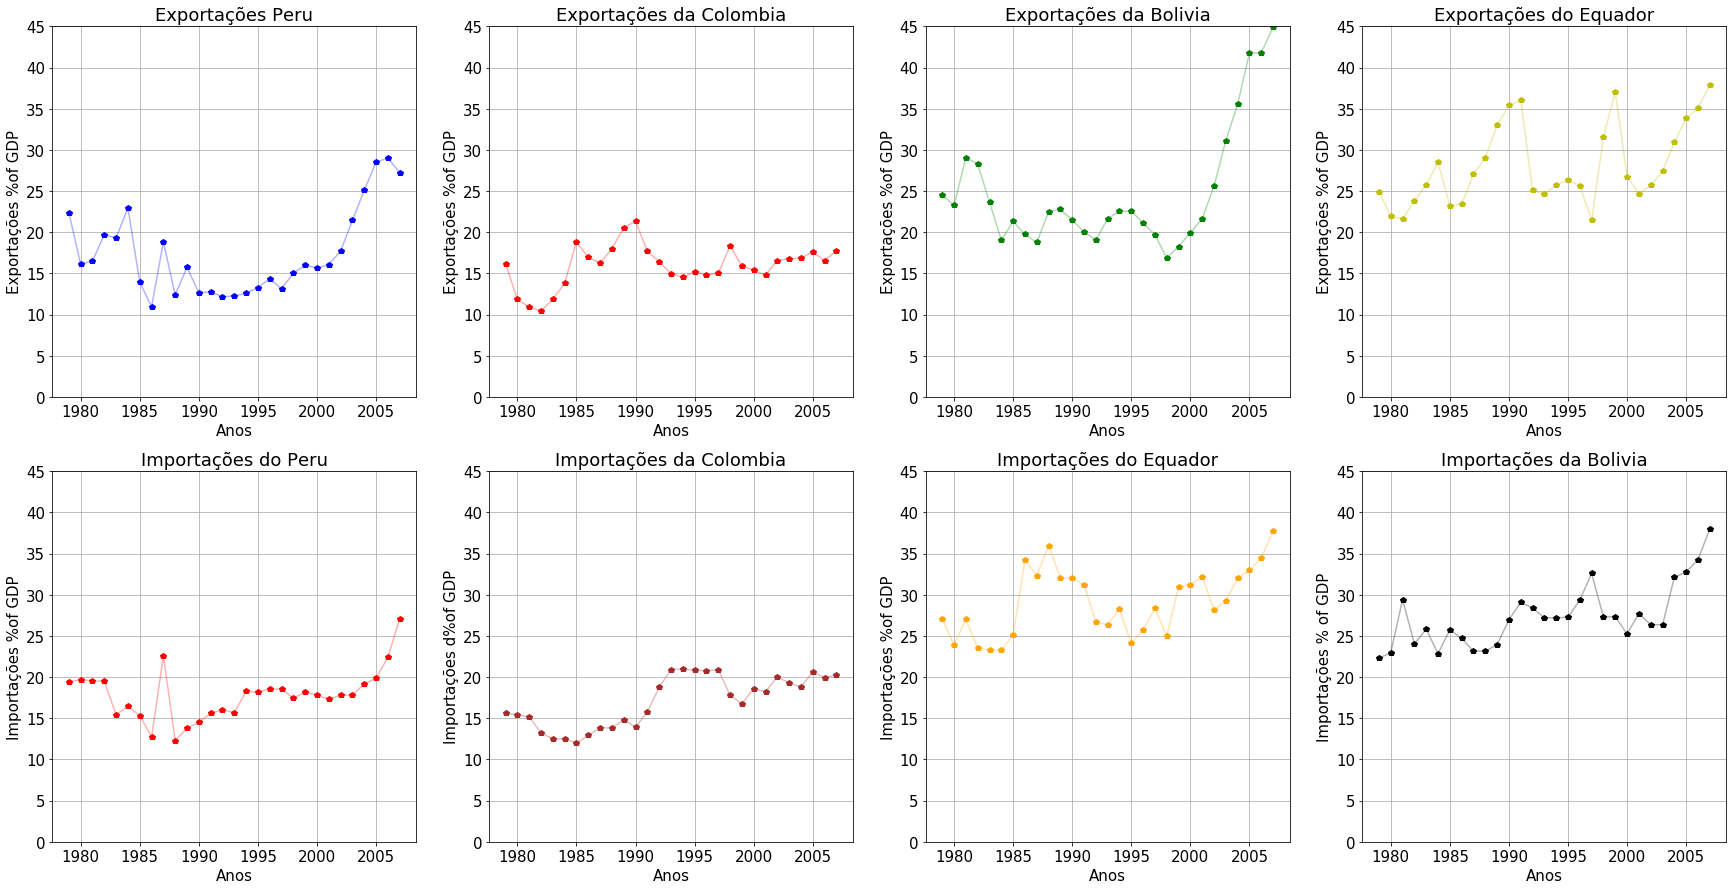

In [153]:
#definido a nossa lista tempo
t=range(1979,2008)

#plotando os graficos
plt.rc("font",size=15)
fig=plt.figure(figsize=(30, 15))

#a=t.cov(inside_eua_export)/t.var()
#b=inside_eua_export.mean()-a*t.mean()
#plotando gráficos das Exportações
plt.subplot(241)
plot=plt.plot(t,y,'pb')
plot=plt.plot(t,y,'b',alpha=0.3)
plt.title('Exportações Peru')
plt.xlabel("Anos")
plt.ylabel("Exportações %of GDP")
plt.ylim(0,45)
plt.grid(True)

plt.subplot(242)
plot=plt.plot(t,colombia_export,'pr')
plot=plt.plot(t,colombia_export,'r', alpha=0.3)
plt.title("Exportações da Colombia")
plt.xlabel("Anos")
plt.ylabel("Exportações %of GDP")
plt.ylim(0,45)
plt.grid(True)

plt.subplot(243)
plot=plot=plt.plot(t,bolivia_export,'pg')
plot=plt.plot(t,bolivia_export,'g', alpha=0.3)
plt.title("Exportações da Bolivia")
plt.xlabel("Anos")
plt.ylabel("Exportações %of GDP")
plt.ylim(0,45)
plt.grid(True)

plt.subplot(244)
plot=plot=plt.plot(t,equador_export,'py')
plot=plt.plot(t,equador_export,'y', alpha=0.3)
plt.title("Exportações do Equador")
plt.xlabel("Anos")
plt.ylabel("Exportações %of GDP")
plt.ylim(0,45)
plt.grid(True)

#plotando gráficos das Importações
plt.subplot(248)
plot=plt.plot(t,bolivia_import,'p',color="black")
plot=plt.plot(t,bolivia_import,color="black",alpha=0.3)
plt.title('Importações da Bolivia')
plt.xlabel("Anos")
plt.ylabel("Importações % of GDP")
plt.ylim(0,45)
plt.grid(True)

plt.subplot(247)
plot=plt.plot(t,equador_import,'p',color="orange")
plot=plt.plot(t,equador_import,color="orange", alpha=0.3)
plt.title("Importações do Equador")
plt.xlabel("Anos")
plt.ylabel("Importações %of GDP")
plt.ylim(0,45)
plt.grid(True)


plt.subplot(246)
plot=plot=plt.plot(t,colombia_import,'p',color="brown")
plot=plt.plot(t,colombia_import,color="brown", alpha=0.3)
plt.title("Importações da Colombia")
plt.xlabel("Anos")
plt.ylabel("Importações d%of GDP")
plt.ylim(0,45)
plt.grid(True)

plt.subplot(245)
plot=plot=plt.plot(t,peru_import,'p',color="red")
plot=plt.plot(t,peru_import,color="red", alpha=0.3)
plt.title("Importações do Peru")
plt.xlabel("Anos")
plt.ylabel("Importações %of GDP")
plt.ylim(0,45)
plt.grid(True)


plt.show()


-É possível notar que a quantidade de exportações e importações aumentam após 1992, quando foi criada a zona de livre comércio,
mas ainda não é possível perceber se a causa é realmente a zona ou se é uma tendencia mundial.

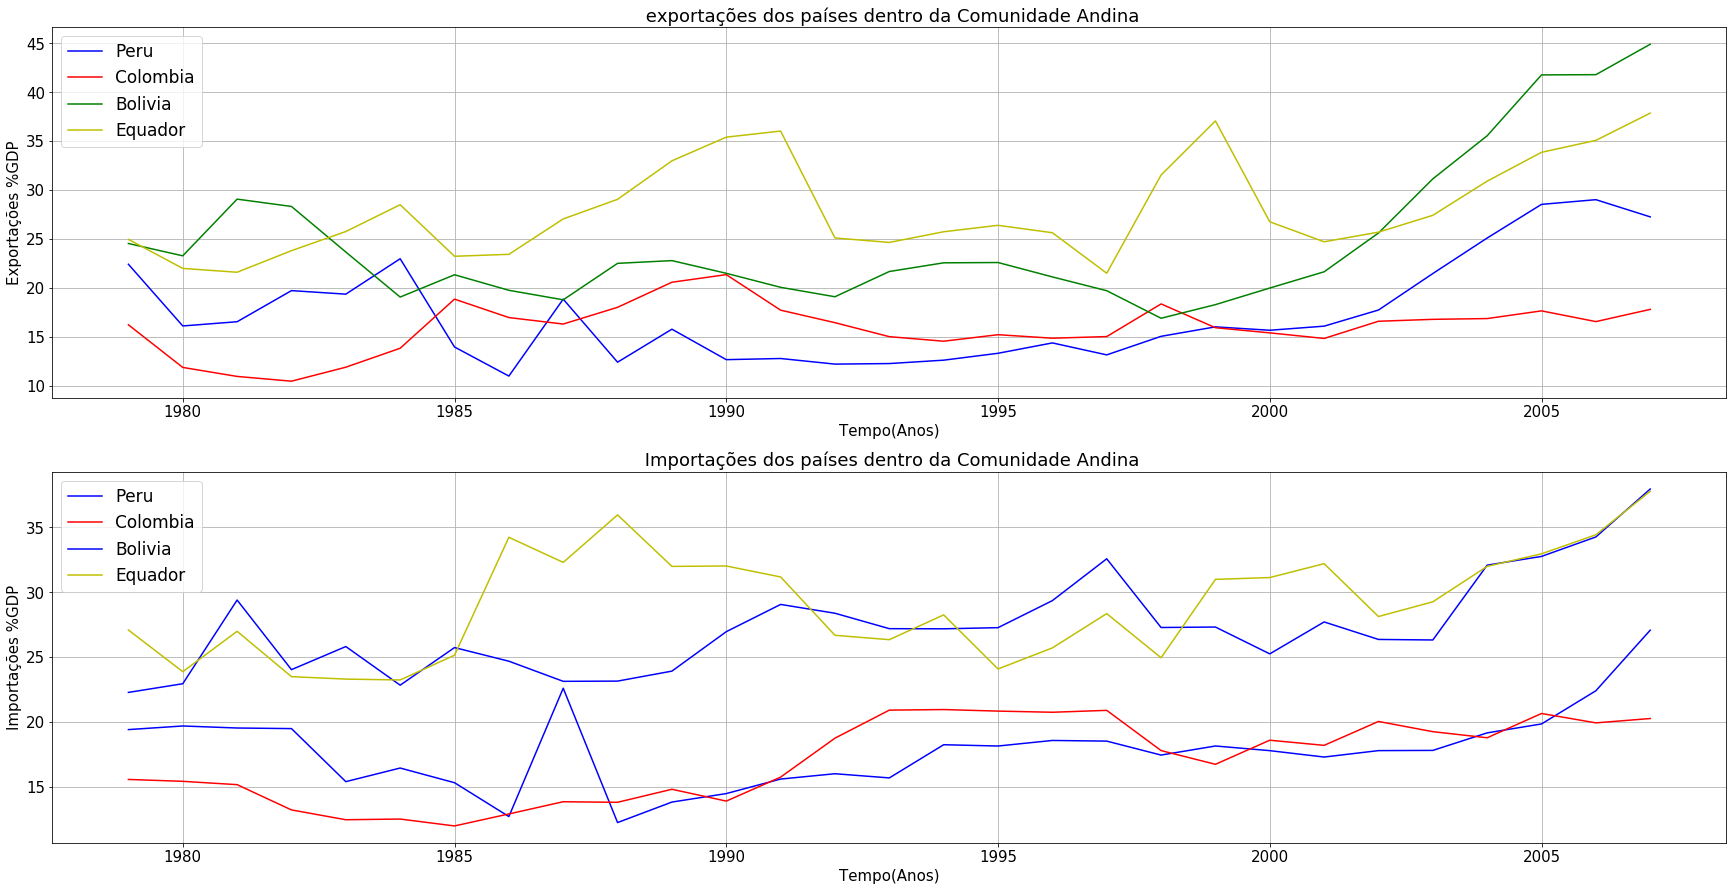

In [143]:
plt.rc("font",size=15)
fig=plt.figure(figsize=(30, 15))

plt.subplot(211)
plot=plt.plot(t,y,'b',alpha=1)

plot=plt.plot(t,colombia_export,'r', alpha=1)

plotplot=plt.plot(t,bolivia_export,'g', alpha=1)

plotplot=plt.plot(t,equador_export,'y', alpha=1)

plt.title(" exportações dos países dentro da Comunidade Andina")
plt.xlabel("Tempo(Anos)")
plt.ylabel("Exportações %GDP")
plt.legend(('Peru', 'Colombia', 'Bolivia','Equador'))
plt.grid(True)




plt.subplot(212)
plot=plt.plot(t,peru_import,'b',alpha=1)

plot=plt.plot(t,colombia_import,'r', alpha=1)

plotplot=plt.plot(t,bolivia_import,'b', alpha=1)

plotplot=plt.plot(t,equador_import,'y', alpha=1)

plt.title(" Importações dos países dentro da Comunidade Andina")
plt.xlabel("Tempo(Anos)")
plt.ylabel("Importações %GDP")
plt.legend(('Peru', 'Colombia', 'Bolivia','Equador'))

plt.grid(True)


Text(0, 0.5, 'Importações %')

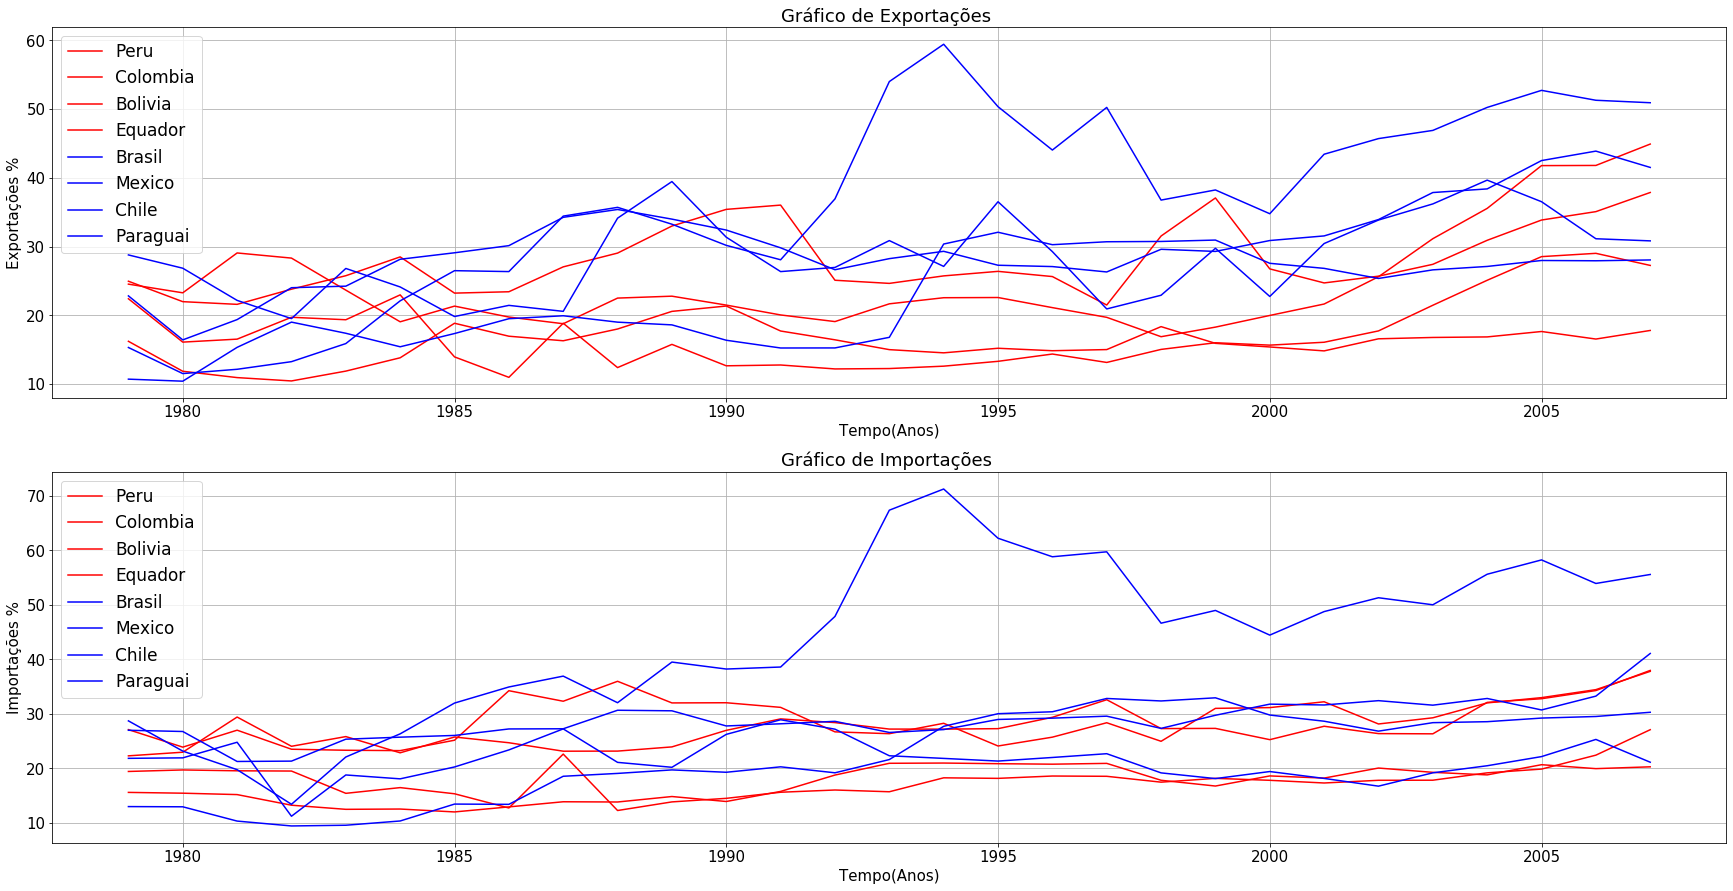

In [148]:
#exportações
plt.rc("font",size=15)
fig=plt.figure(figsize=(30,15))

plt.subplot(211)
plot=plt.plot(t,y,'r',alpha=1)

plot=plt.plot(t,colombia_export,'r', alpha=1)

plotplot=plt.plot(t,bolivia_export,'r', alpha=1)

plotplot=plt.plot(t,equador_export,'r', alpha=1)

plotplot=plt.plot(t,brazil_export,'b', alpha=1)

plotplot=plt.plot(t,mexico_export,'b', alpha=1)

plotplot=plt.plot(t,chile_export,'b' , alpha=1)

plotplot=plt.plot(t,paraguay_export,'b', alpha=1)
plt.legend(('Peru', 'Colombia', 'Bolivia','Equador','Brasil','Mexico','Chile','Paraguai'))





plt.grid(True)
plt.title("Gráfico de Exportações ")
plt.xlabel("Tempo(Anos)")
plt.ylabel("Exportações %")

#importações
plt.subplot(212)
plot=plt.plot(t,peru_import,'r',alpha=1)

plot=plt.plot(t,colombia_import,'r', alpha=1)

plotplot=plt.plot(t,bolivia_import,'r', alpha=1)

plotplot=plt.plot(t,equador_import,'r', alpha=1)

plotplot=plt.plot(t,brazil_import,'b', alpha=1)

plotplot=plt.plot(t,mexico_import,'b', alpha=1)

plotplot=plt.plot(t,chile_import,'b', alpha=1)

plotplot=plt.plot(t,paraguay_import,'b', alpha=1)
plt.legend(('Peru', 'Colombia', 'Bolivia','Equador','Brasil','Mexico','Chile','Paraguai'))


plt.grid(True)
plt.title("Gráfico de Importações ")
plt.xlabel("Tempo(Anos)")
plt.ylabel("Importações %")


-Analisando esse últim gráfico pode-se perceber que a zona de livre comércio mesmo aumentando as importações e exportações dos países presentes na comunidade andina, esse aumento também ocorre em outros países analisados, mas um desses motivos pode ser, que esses outros países também pertençam a outras organizações internacionais ou tenha outros acordos de livre comércio, como o Brasil que faz parte do MERCOSUL e o México que faz parte da USMCA

## Conclusão

__Pergunta:__
Houve aumento das exportações/importações após 1992, no qual foi criado uma zona de livre comercio entre os países membros?


A partir dos gráficos mostrados à cima é possível perceber que houve um aumento real nas importações e exportações a partir dos anos 1992, no qual foi feito o acordo da zona de livre comércio, mesmo o impacto de tal acordo não sendo de imediato, como vimos no gráfico de barras, no qual os anos após o acordo, o impacto existe. Além disso, podemos notar, principalmente pelo último gráfico que esse aumento nas importações e exportações também ocorre em outros países em um nível parecido com os países integrantes da Comunidade Andina, mas uma das possíveis razões é que todos os países comparados também se fazem presentes em outras organizações internacionais, como o Brasil que é integrante do MERCOSUL. Ademais, a Colombia, pais integrante da Comunidade Andina, não sofreu alterações relevantes na sua porcentagem de exportação e importação.

Estas observações nos levam a questionar se os aumentos de importações e exportações foram realmentes causados pela zona de troca livre ou por causa da economia munidal em geral